# Table of Contents
<div class="lev1 toc-item"><a href="#Exercise-3.5.--Try-out-gradient-descent" data-toc-modified-id="Exercise-3.5.--Try-out-gradient-descent-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 3.5.  Try out gradient descent</a></div><div class="lev1 toc-item"><a href="#Exercise-3.6.-Compare-fixed-and-diminishing-steplengths-for-a-simple-example" data-toc-modified-id="Exercise-3.6.-Compare-fixed-and-diminishing-steplengths-for-a-simple-example-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 3.6. Compare fixed and diminishing steplengths for a simple example</a></div><div class="lev1 toc-item"><a href="#Exercise-3.9.-Code-up-momentum-accelerated-gradient-descent" data-toc-modified-id="Exercise-3.9.-Code-up-momentum-accelerated-gradient-descent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 3.9. Code up momentum-accelerated gradient descent</a></div>

In [1]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 3.1.  First-order condition for optimality

See picture of hand-written notes for calculations.

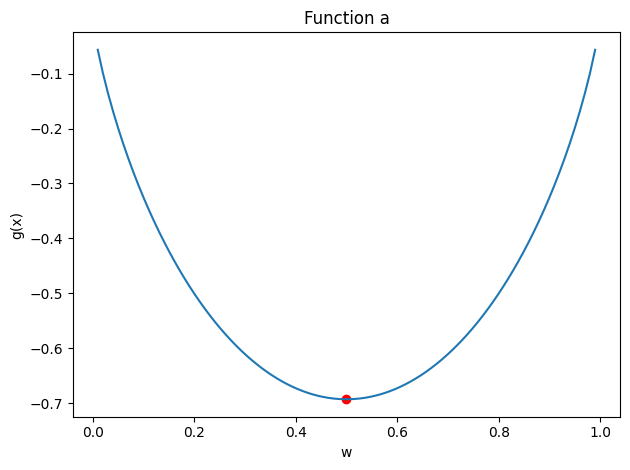

w = 1/2 is minimum


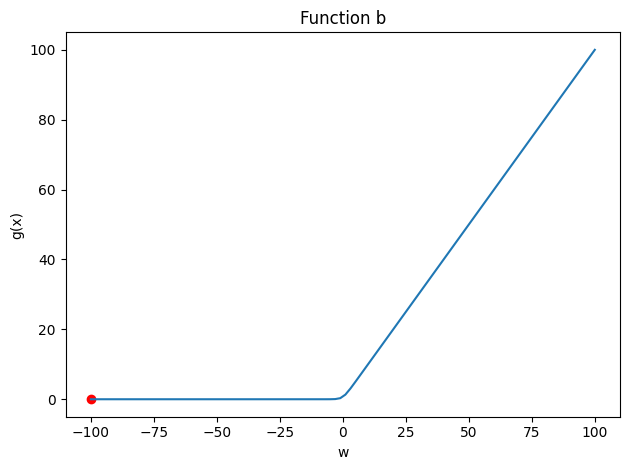

w = - inf is minimum


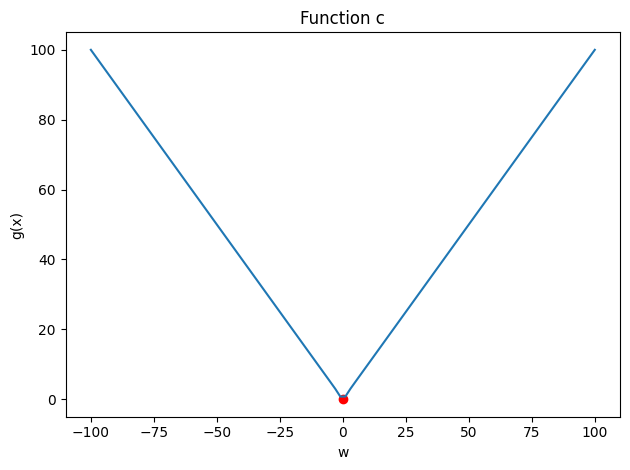

w = 0 is minimum


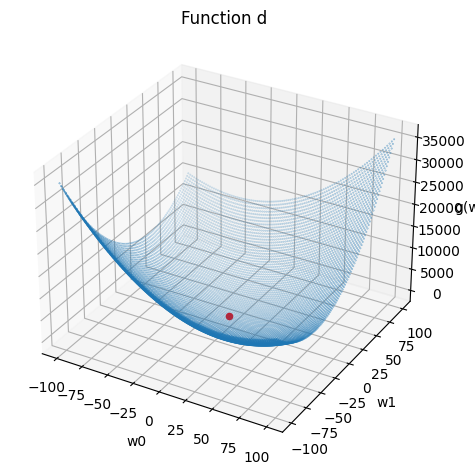

w = [-0.4, -0.2] is minimum


In [2]:
import math
# a) Plotting g(w) = wlog(w) + (1-w)log(1-w), 0<w<1, at w = 1/2

g = lambda w: w*np.log(w) + (1-w)*np.log(1-w)
w = np.linspace(0, 1, 100)[1:-1]  #don't include start and end points
plt.plot(w, g(w))
w1 = 1/2
plt.scatter(w1,g(w1),color = 'red')
plt.title('Function a')
plt.xlabel('w')
plt.ylabel('g(x)')
plt.show()
print('w = 1/2 is minimum')

# b) Plotting g(w) = log(1+e^w), at w = negative infinity

g = lambda w: np.log(1+math.e**w)
w = np.linspace(-100, 100, 100) 
plt.plot(w, g(w))
w1 = w[0]   #can't have negative infinity plotted, thus plotting the most negative number in plotting range
plt.scatter(w1,g(w1),color = 'red')
plt.title('Function b')
plt.xlabel('w')
plt.ylabel('g(x)')
plt.show()
print('w = - inf is minimum')

# c) Plotting g(w) = wtanh(w), at w = 0
g = lambda w: w*np.tanh(w)
w = np.linspace(-100, 100, 100) 
plt.plot(w, g(w))
w1 = 0
plt.scatter(w1,g(w1),color = 'red')
plt.title('Function c')
plt.xlabel('w')
plt.ylabel('g(x)')
plt.show()
print('w = 0 is minimum')

# d) Plotting g(w) = 1/2 w.T * C * w + b.T * w where C = [[2,1],[1,3]] and b = [1,1], at w = [-0.4, -0.2]
C = np.array([[2,1],[1,3]])
b = np.array([1,1])

g = lambda w: 1/2*w.T@C@w + b.T@w
w1, w2 = np.linspace(-100,100, 100), np.linspace(-100, 100, 100)
w1, w2 = np.meshgrid(w1,w2)
w = np.concatenate((w1.reshape(len(w1)**2, 1), w2.reshape(len(w2)**2, 1)), axis=1)
ax = plt.axes(projection='3d')
z = [g(i) for i in w]
ax.scatter3D(w1,w2,z,s = 0.1)

w1 = np.array([-0.4, -0.2])
ax.scatter3D(w1[0],w1[1],g(w1),color = 'red',zorder = 1)
plt.title('Function d')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('g(w)')
plt.tight_layout()
plt.show()
print('w = [-0.4, -0.2] is minimum')


# Exercise 3.3.  Stationary points of the Rayleigh quotient

See picture of hand-written notes for calculations.

# Exercise 3.5.  Try out gradient descent

In this exercise you will implement gradient descent using the hand-computed derivative.

$$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10 \right)$$

A skeleton of the desired algorithm is in the cell below.  All parts marked "TO DO" are for you to construct.

In [3]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    
    # the gradient function for this example
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        gradient = grad(w)

        # take gradient descent step
        ## TO DO
        w = w - alpha*gradient
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history

last step cost of alpha = 1 is  -0.16996928446309353
last step cost of alpha = 0.1 is  -0.16996928446309353
last step cost of alpha = 0.01 is  -0.12249665467157385


Text(0.5, 1.0, 'Cost function history plot with varying steplength')

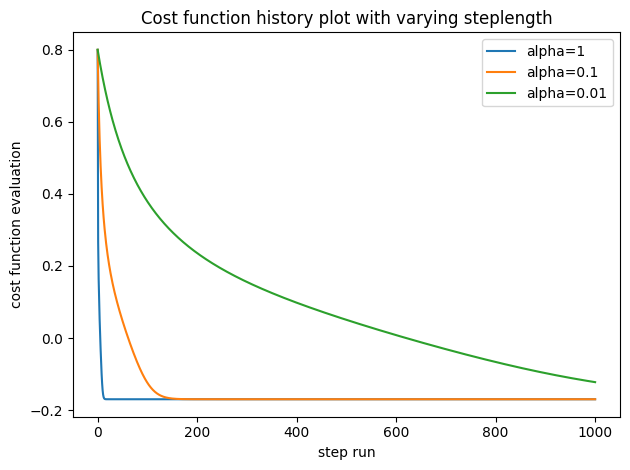

In [4]:
import matplotlib.pyplot as plt
# initial point
w = 2.0
max_its = 1000

# produce gradient descent runs
alpha = 10**(0)
cost_history_1 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 1 is ',cost_history_1[-1])
plt.plot(range(0,max_its+1),cost_history_1, label = 'alpha='+str(alpha))

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 0.1 is ',cost_history_2[-1])
plt.plot(range(0,max_its+1),cost_history_2, label = 'alpha='+str(alpha))


alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 0.01 is ',cost_history_3[-1])
plt.plot(range(0,max_its+1),cost_history_3, label = 'alpha='+str(alpha))

plt.legend()
plt.xlabel('step run')
plt.ylabel('cost function evaluation')
plt.title('Cost function history plot with varying steplength')
# plot cost function histories


In this particular example, both alpha = 1 and 0.1 steplengths value manage to converge to a minimum point around g(w) = -0.17 in 1000 steps, and alpha = 1 converges fastest, so alpha =1 performs best.

# Exercise 3.8.  Tune fixed steplength for gradient descent

In [5]:
import autograd
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: np.dot(w.T, w)[0,0]
    
    # the gradient function for this example
    grad = autograd.grad(g)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        gradient = grad(w)

        # take gradient descent step
        ## TO DO
        w = w - alpha*gradient
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history

last step cost of alpha = 0.001 is  670.0516137378235
last step cost of alpha = 0.1 is  4.1495155688809997e-17
last step cost of alpha = 1 is  1000.0


Text(0.5, 1.0, 'Cost function history plot with varying steplength')

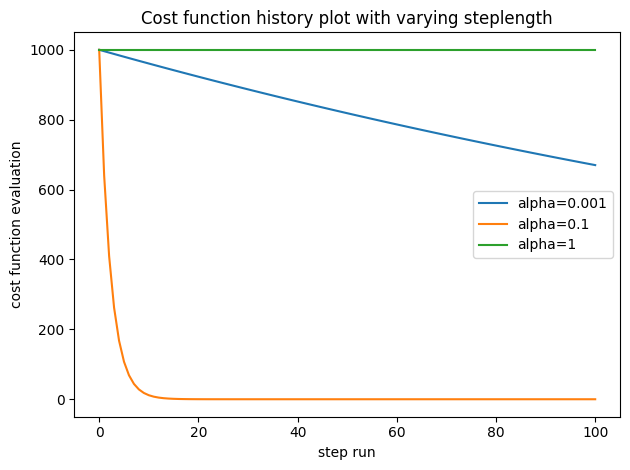

In [6]:
# initial point
import numpy as np
N = 10
w = 10 * np.ones((N,1))
max_its = 100

# produce gradient descent runs
alpha = 10**(-3)
cost_history_1 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 0.001 is ',cost_history_1[-1])
plt.plot(range(0,max_its+1),cost_history_1, label = 'alpha='+str(alpha))

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 0.1 is ',cost_history_2[-1])
plt.plot(range(0,max_its+1),cost_history_2, label = 'alpha='+str(alpha))


alpha = 10**(0)
cost_history_3 = gradient_descent(alpha,max_its,w)
print('last step cost of alpha = 1 is ',cost_history_3[-1])
plt.plot(range(0,max_its+1),cost_history_3, label = 'alpha='+str(alpha))

plt.legend()
plt.xlabel('step run')
plt.ylabel('cost function evaluation')
plt.title('Cost function history plot with varying steplength')
# plot cost function histories


In this particular example, both alpha = 1 and 0.001 didn't converge to the minimum at w = 0 (Nx1), g(w)=0 in 100 steps. alpha = 1 is not converging at all, alpha = 0.001 converges too slowly, only alpha = 0.1 did, so alpha = 0.1 performs best in this example.